In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [57]:
df_pyspark = pd.read_csv('./results/sample750/pyspark_results.csv').drop(['ds_name', 'uniqie_pairs_sim_docs'], axis=1)
df_sequential = pd.read_csv('./results/sample750/sequential_results.csv').drop(['ds_name', 'uniqie_pairs_sim_docs'], axis=1)
thresholds = df_sequential['threshold'].unique()
workers = df_pyspark['workers'].unique()
sliceFactors = df_pyspark['slice_factor'].unique()

FileNotFoundError: [Errno 2] No such file or directory: './results/sample750/pyspark_results.csv'

In [ ]:
df_np_seq = df_sequential[df_sequential['type'] == 'numpy']
df_np_seq = df_np_seq.drop(['type'], axis=1)

df_cl_seq = df_sequential[df_sequential['type'] == 'classic']
df_cl_seq = df_cl_seq.drop(['type'], axis=1)

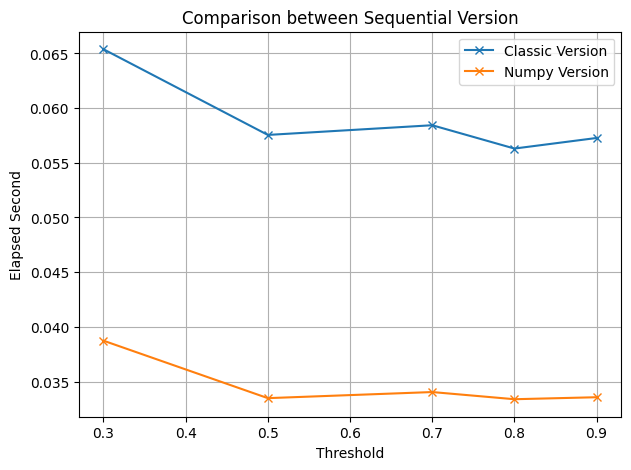

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(thresholds, df_cl_seq['elapsed'], label='Classic Version', marker='x')
ax.plot(thresholds, df_np_seq['elapsed'], label='Numpy Version', marker='x')

ax.set_xlabel('Threshold')
ax.set_ylabel('Elapsed Second')
ax.set_title('Comparison between Sequential Version')
ax.grid()
ax.legend()

plt.show()

In [ ]:
df_sliceFactors = {}
for fslice in sliceFactors:
  temp_df = df_pyspark[df_pyspark['slice_factor'] == fslice]
  temp_df = temp_df.drop(['slice_factor'], axis=1)
  df_sliceFactors[fslice] = temp_df

In [ ]:
df_speedup = {}
for sc, df in df_sliceFactors.items():
  temp = pd.merge(df_np_seq, df, on='threshold', suffixes=('_np', '_ps'))
  temp['speedup'] = temp['elapsed_np'] / temp['elapsed_ps']
  df_speedup[sc] = temp

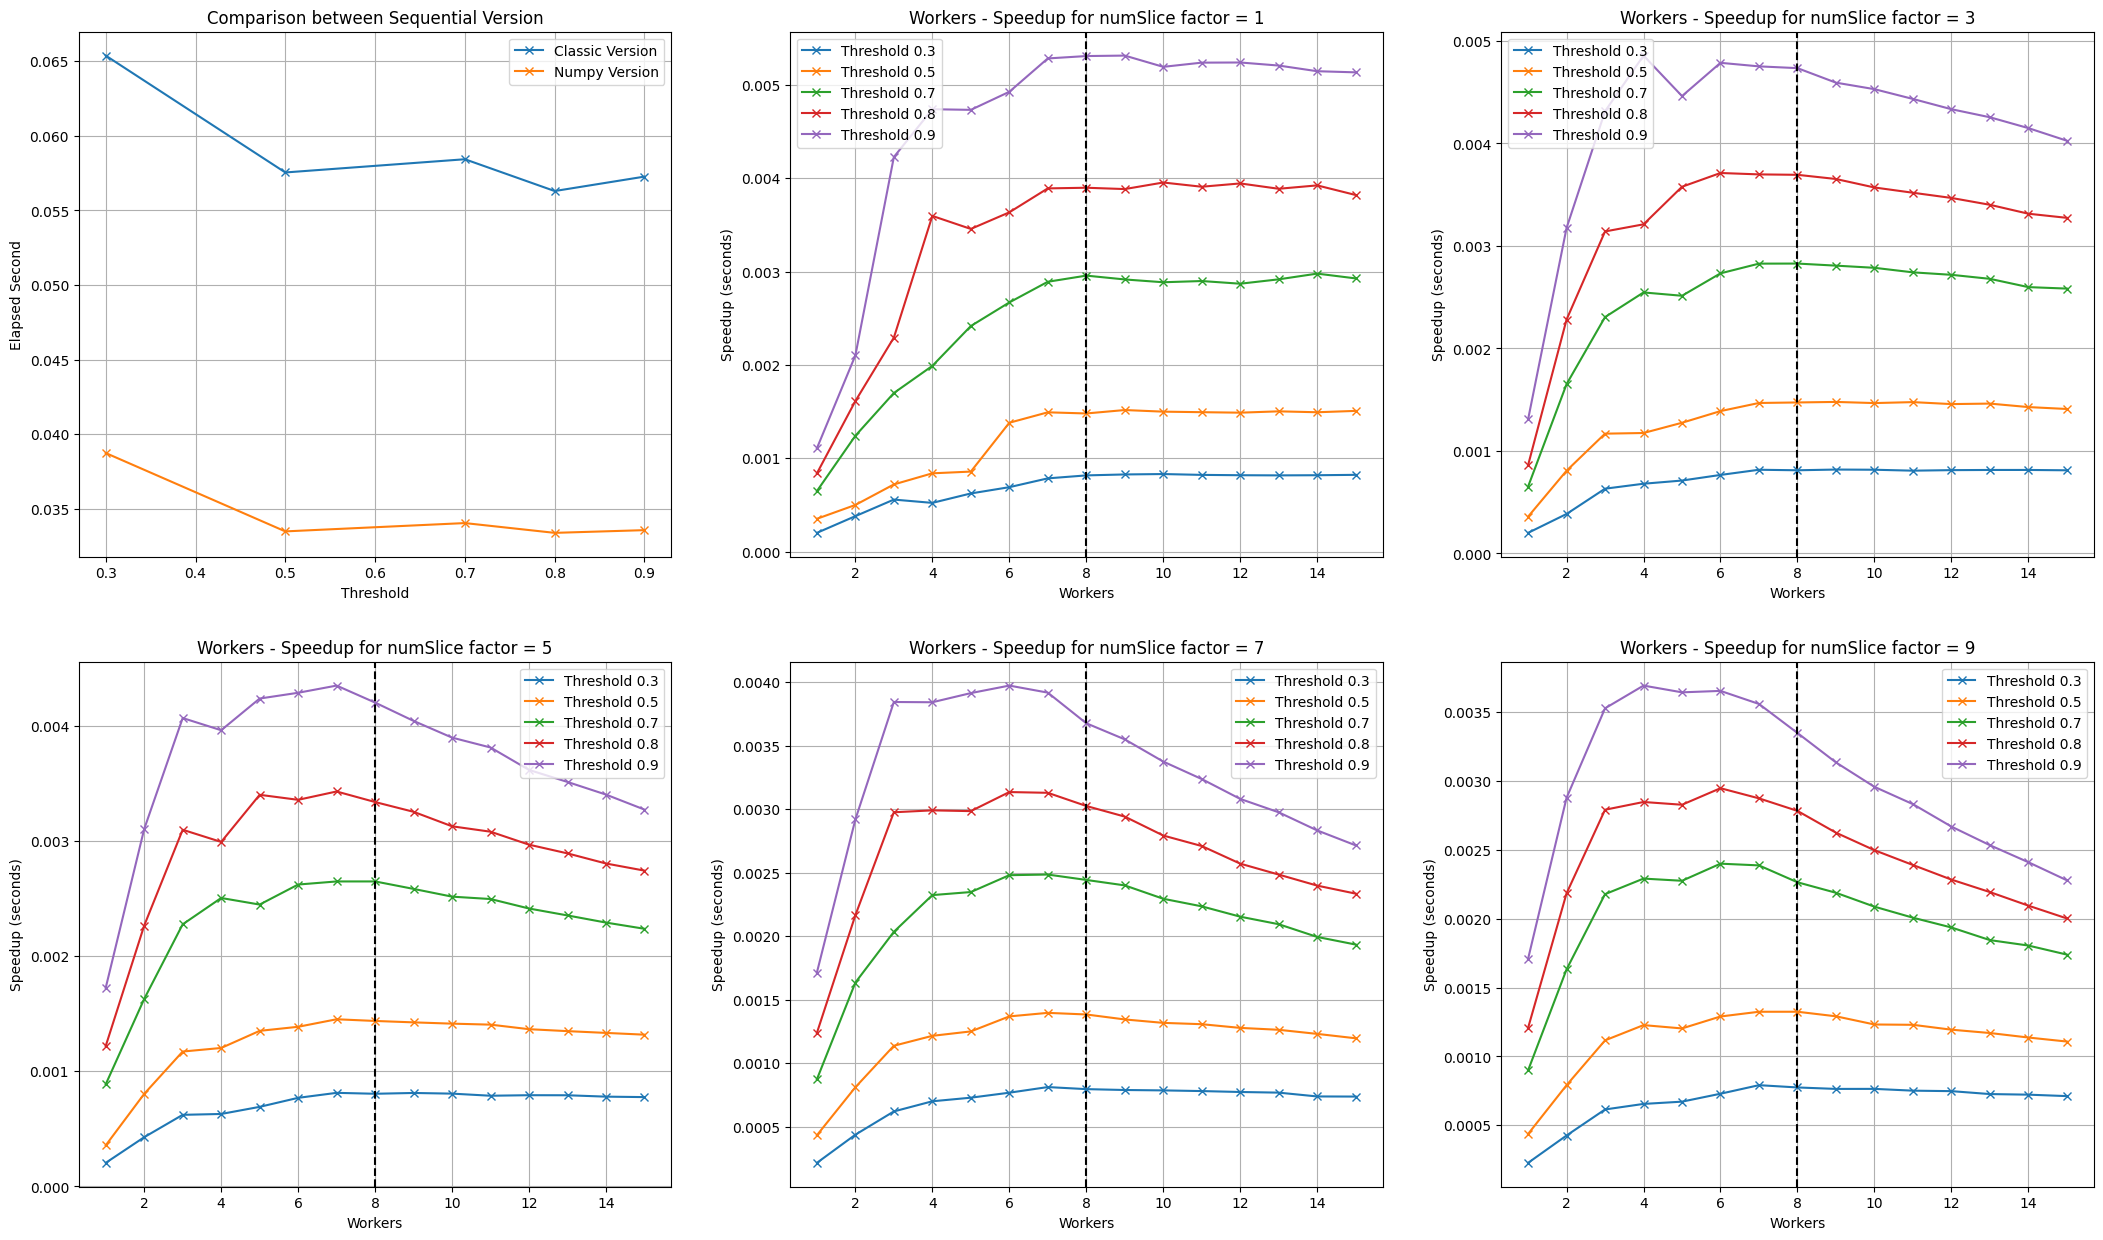

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(26, 15))

sf_keyes_position = list(df_speedup.keys())

for idr, row in enumerate(axs):
    
  for idc, col in enumerate(row):
    if idr == idc == 0:
      col.plot(thresholds, df_cl_seq['elapsed'], label='Classic Version', marker='x')
      col.plot(thresholds, df_np_seq['elapsed'], label='Numpy Version', marker='x')

      col.set_xlabel('Threshold')
      col.set_ylabel('Elapsed Second')
      col.set_title('Comparison between Sequential Version')
    else:
        
      sf_indef = (idc-1)+idr*3 if idr == 0 else idc+(idr*3-1)
      df = df_speedup[sf_keyes_position[sf_indef]]
      for th in thresholds:
        col.plot(workers, df[df['threshold'] == th]['speedup'], label=f'Threshold {th}', marker='x')   

      col.axvline(x=8, color='black', ls='--')
      col.set_xlabel('Workers')
      col.set_ylabel('Speedup (seconds)')
      col.set_title(f'Workers - Speedup for numSlice factor = {sf_keyes_position[sf_indef]}')
      col.xaxis.set_major_locator(MaxNLocator(integer=True))
    col.grid()
    col.legend()
plt.show()